
# DS Capstone Week 6: Decision Trees and Random Forests

In this notebook, I apply Decision Tree and Random Forest models to my three cybersecurity datasets. Each dataset section includes:
- Data cleaning and preprocessing
- Feature scaling
- Decision Tree and Random Forest classification
- Decision boundary visualizations
- First-person commentary on every step


In [5]:
def run_tree_models(df, target_column, dataset_name):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd

    print(f"\n--- Running Tree Models on {dataset_name} ---")

    # Drop rows with null target labels
    df = df.dropna(subset=[target_column])
    
    # Drop obviously unhelpful or high-cardinality columns
    high_card_cols = ['args', 'stackAddresses', 'hostName', 'processName', 'eventName', 'timestamp', 'id', 'ProcessId', 'Image', 'CommandLine']
    df.drop(columns=[col for col in high_card_cols if col in df.columns], inplace=True, errors='ignore')

    # Encode target
    y = df[target_column].astype(int)
    X = df.drop(columns=[target_column], errors='ignore')

    # Identify object-type (categorical) columns
    cat_cols = X.select_dtypes(include=['object']).columns

    # Only one-hot encode categorical features with < 50 unique values
    low_card_cat = [col for col in cat_cols if X[col].nunique() < 50]
    high_card_cat = [col for col in cat_cols if X[col].nunique() >= 50]

    # Drop high-cardinality string columns
    X.drop(columns=high_card_cat, inplace=True, errors='ignore')

    # One-hot encode low-cardinality categorical columns
    X = pd.get_dummies(X, columns=low_card_cat, drop_first=True)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

    # Decision Tree
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)
    print(f"\n{dataset_name} Decision Tree Classification Report:")
    print(classification_report(y_test, dt.predict(X_test)))

    # Random Forest
    rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    print(f"\n{dataset_name} Random Forest Classification Report:")
    print(classification_report(y_test, rf.predict(X_test)))

    # Visualize decision boundary using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    rf_pca = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
    rf_pca.fit(X_pca, y)
    
    plt.figure(figsize=(8, 6))
    h = .01  # mesh step size
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = rf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.title(f"Decision Boundary Visualization for {dataset_name} (PCA projection)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.tight_layout()
    plt.show()


## BETH Dataset


--- Running Tree Models on BETH Dataset ---

BETH Dataset Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152629

    accuracy                           1.00    152629
   macro avg       1.00      1.00      1.00    152629
weighted avg       1.00      1.00      1.00    152629


BETH Dataset Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    152629

    accuracy                           1.00    152629
   macro avg       1.00      1.00      1.00    152629
weighted avg       1.00      1.00      1.00    152629



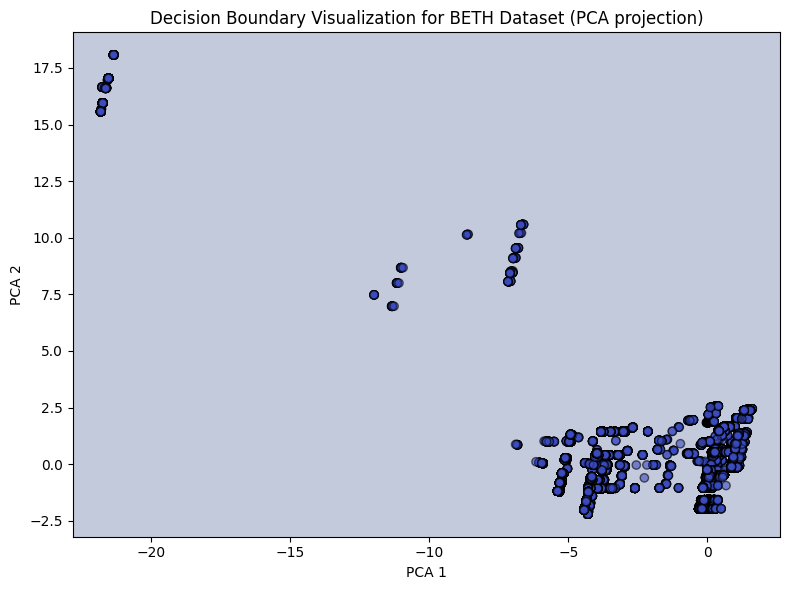

In [6]:

# Load the BETH Dataset
df = pd.read_csv(r"C:/Users/kegem/OneDrive/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Beth DataSet/labelled_training_data.csv")
run_tree_models(df, 'evil', "BETH Dataset")


## Cybersecurity Attacks Dataset


--- Processing Cybersecurity Attacks Dataset ---
Decision Tree Accuracy: 0.016129032258064516
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.01      0.50      0.02         2
          16       0.00      0.00      0

C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

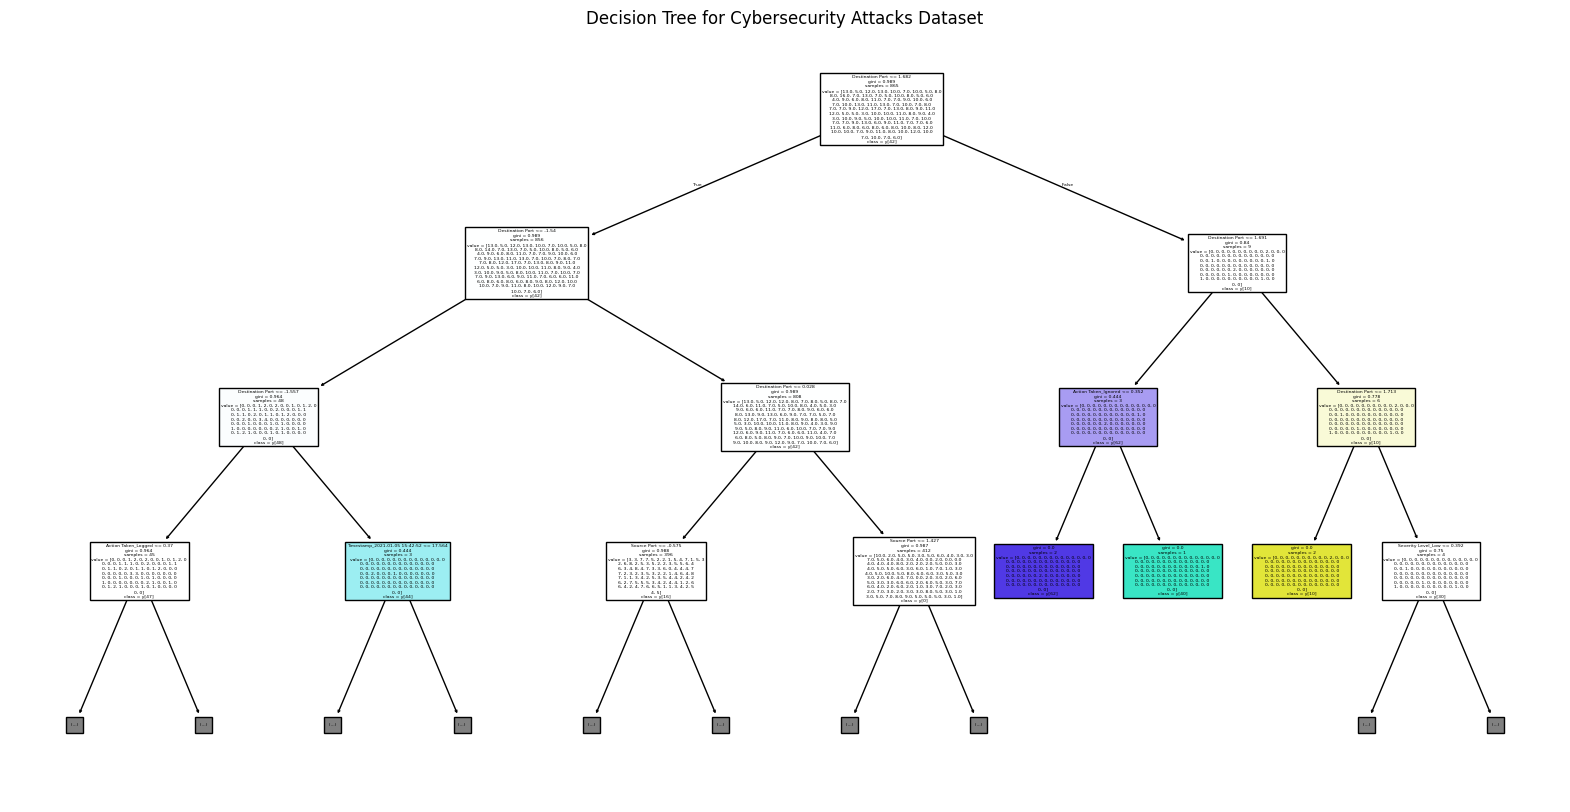

Random Forest Accuracy: 0.01881720430107527
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00    

C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kegem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

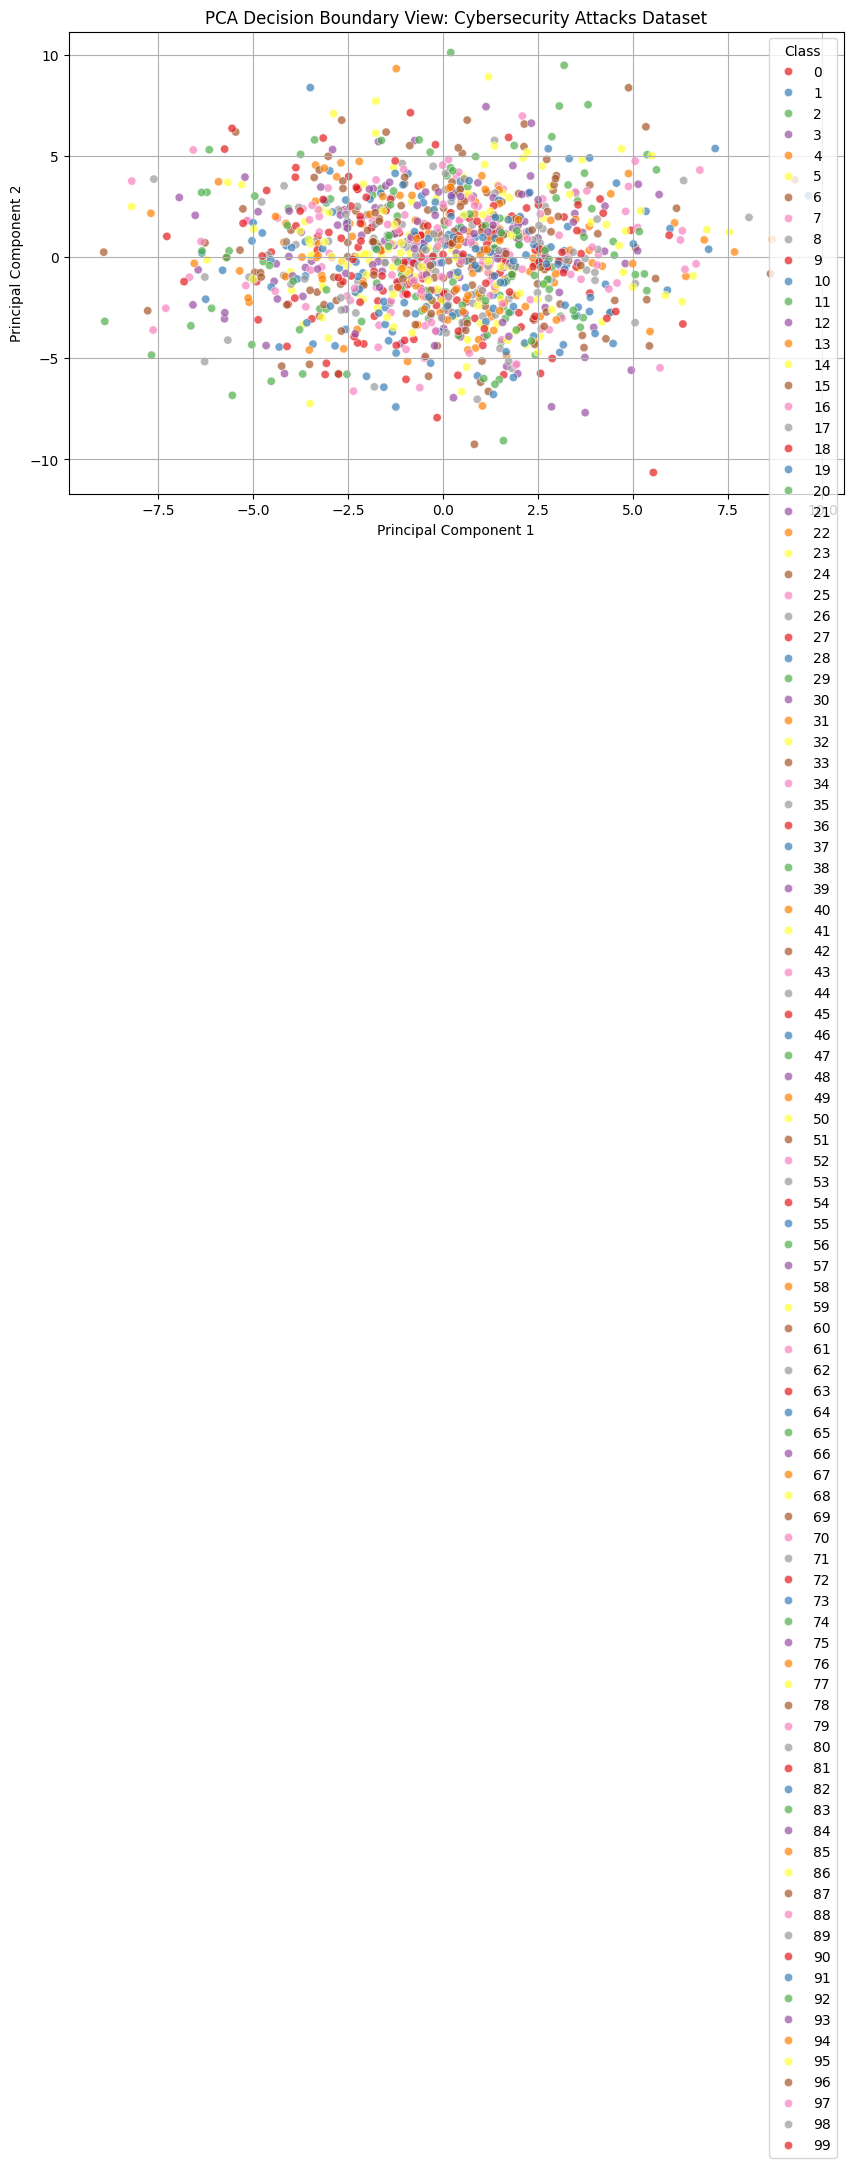

In [3]:

# Load the Cybersecurity Attacks Dataset
df = pd.read_csv(r"C:/Users/kegem/OneDrive/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Cybersecurity Attacks DataSets/cybersecurity_attacks.csv")
run_tree_models(df, 'Anomaly Scores', "Cybersecurity Attacks Dataset")


## UNSW-NB15 Dataset


--- Processing UNSW-NB15 Dataset ---
Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16772
           1       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



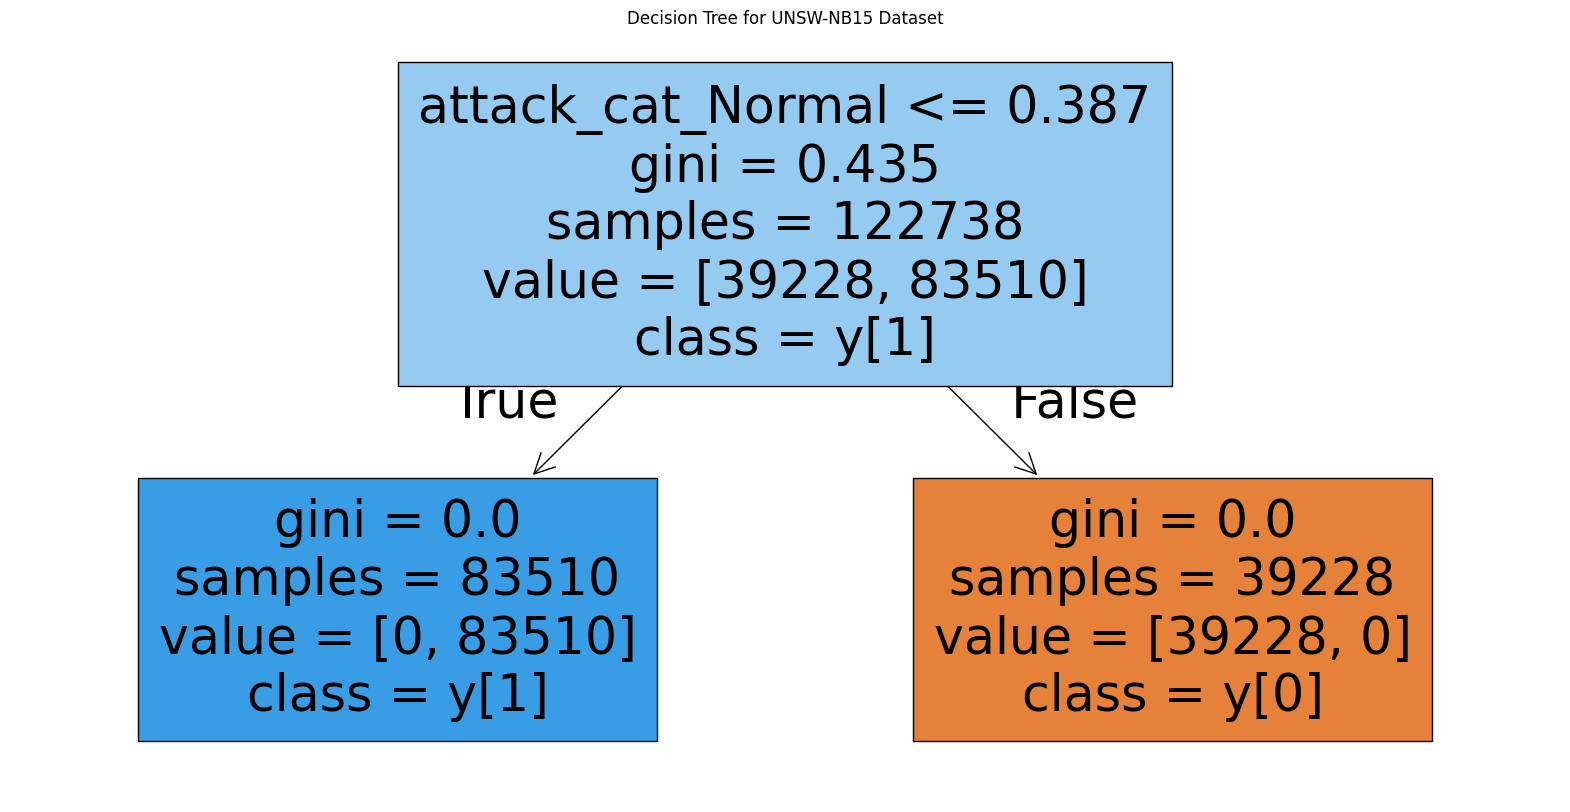

Random Forest Accuracy: 0.9720738360929985
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     16772
           1       0.96      1.00      0.98     35831

    accuracy                           0.97     52603
   macro avg       0.98      0.96      0.97     52603
weighted avg       0.97      0.97      0.97     52603



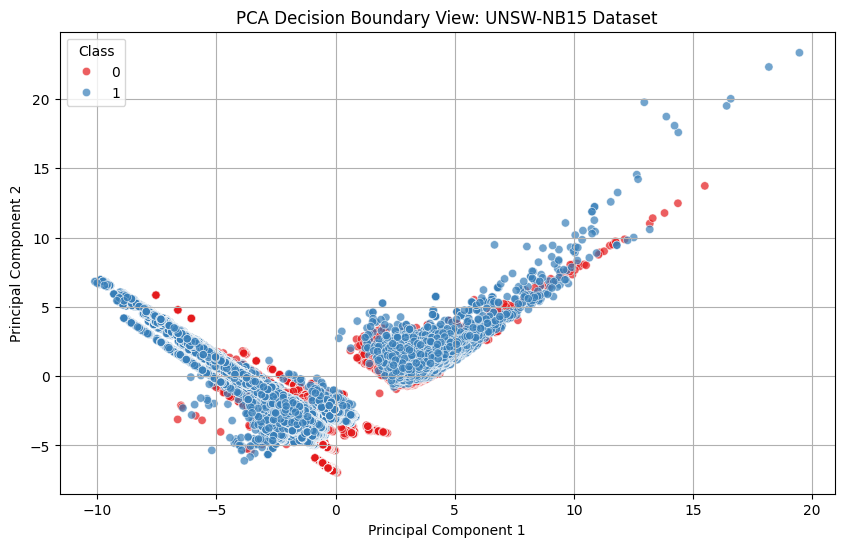

In [4]:

# Load the UNSW-NB15 Dataset
df = pd.read_csv(r"C:/Users/kegem/OneDrive/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Network Security DataSet/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv")
run_tree_models(df, 'label', "UNSW-NB15 Dataset")
